<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [70]:
clear()

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [72]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [73]:
# A: We'll read our file, create a dataframe and then look at the top 5 rows
df = pd.read_csv(sac_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [74]:
# A: All object types are what I expect and there are no null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [75]:
# There aren't any zip codes beginning in 0
df[df['zip'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [76]:
df.isnull().mean()

street       0.0
city         0.0
zip          0.0
state        0.0
beds         0.0
baths        0.0
sq__ft       0.0
type         0.0
sale_date    0.0
price        0.0
latitude     0.0
longitude    0.0
dtype: float64

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [77]:
# We can see from below that there are 172 house listings with zero or negative square footages. 
# We probably want to drop these rows. The rest of the data looks fairly linear and will be usefull in the model.
df[df['sq__ft'] <= 0]['sq__ft'].count()

172

In [78]:
df_sqft_zero = df[df['sq__ft'] <= 0]

df = df.drop(df_sqft_zero.index, axis=0)
df[df['sq__ft'] <= 0]['sq__ft'].count()

0

In [79]:
df['sq__ft'].min()

484

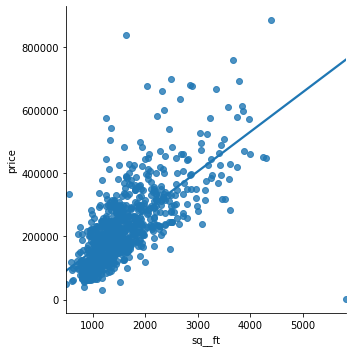

In [80]:
# Square footage and price appear to have a linear relationship
sns.lmplot(x='sq__ft', y='price', data=df, ci=False, fit_reg=True);

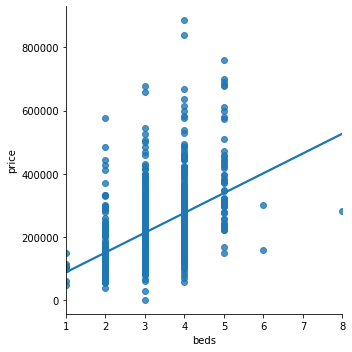

In [81]:
# A: A plot of beds vs price. There doesn't appear to be a linear correlation
sns.lmplot(x='beds', y='price', data=df, ci=False, fit_reg=True);

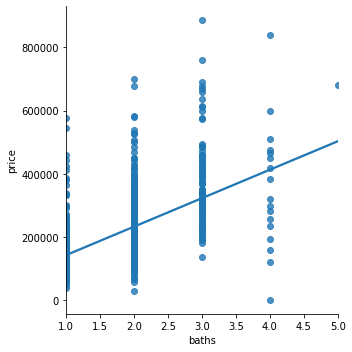

In [82]:
# A: A plot of beds vs price. There doesn't appear to be a linear correlation
sns.lmplot(x='baths', y='price', data=df, ci=False, fit_reg=True);

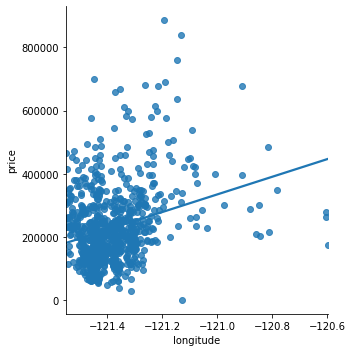

In [83]:
# A: A plot of longitude  vs price. There doesn't appear to be a linear correlation
sns.lmplot(x='longitude', y='price', data=df, ci=False, fit_reg=True);

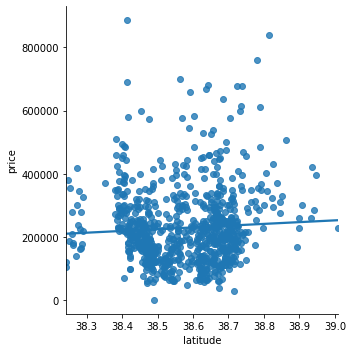

In [84]:
# A: A plot of latitude vs price. There doesn't appear to be a linear correlation
sns.lmplot(x='latitude', y='price', data=df, ci=False, fit_reg=True);

### There doesn't appear to be a linear relationship between price and longitude/latitude

In [85]:
# I've checked the columns and they don't seem to be missing any data
df.sort_values(by='longitude', ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
445,312 RIVER ISLE WAY,SACRAMENTO,95831,CA,3,2,1375,Residential,Mon May 19 00:00:00 EDT 2008,232000,38.490260,-121.550527
117,4727 SAVOIE WAY,SACRAMENTO,95835,CA,5,3,2800,Residential,Wed May 21 00:00:00 EDT 2008,304037,38.658182,-121.549521
318,241 LANFRANCO CIR,SACRAMENTO,95835,CA,4,4,3397,Residential,Tue May 20 00:00:00 EDT 2008,465000,38.665696,-121.549437
446,301 OLIVADI WAY,SACRAMENTO,95834,CA,2,2,1250,Condo,Mon May 19 00:00:00 EDT 2008,232500,38.644406,-121.549049
787,63 ANGEL ISLAND CIR,SACRAMENTO,95831,CA,4,2,2169,Residential,Fri May 16 00:00:00 EDT 2008,311518,38.490408,-121.547664


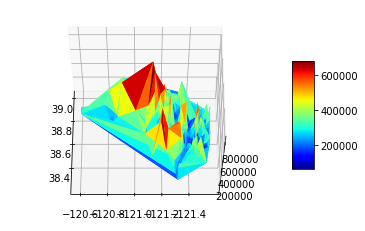

In [86]:
# Source code taken from: https://python-graph-gallery.com/371-surface-plot/
# Latitude and Longitude don't seem to have a linear relationship with saleprice
from mpl_toolkits.mplot3d import Axes3D
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['latitude'], df['longitude'], df['price'], cmap=plt.cm.jet, linewidth=0.2)
# Rotate it
ax.view_init(60, 180)
# plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['latitude'], df['longitude'], df['price'], cmap=plt.cm.jet, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 

# Other palette
# ax.plot_trisurf(df['latitude'], df['longitude'], df['price'], cmap=plt.cm.jet, linewidth=0.01)
# plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [87]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

**Answer:** The square footage has the best linear relationship to price. This linear relationship will fit an SLR model's assumptions well.


### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [88]:
# Import our sklear libraries and set X and y for our model.
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

features = ['sq__ft']
X = df[features]
y = df['price']

In [89]:
# Create a linear model and print the average of the residuals
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_
linreg.intercept_
print(list(zip(features, linreg.coef_)))

# Making predictions
predictions = linreg.predict(X)
# print(predictions)
# Residuals
residuals = y - predictions
print(residuals.mean())

[('sq__ft', 125.31418257510141)]
6.551046707973269e-12


In [90]:
# Print out the metrics for our model

out_string = "The Coef is : " + str(linreg.coef_)
print(out_string)

out_string = "The Y Intercept is : " + str(linreg.intercept_)
print(out_string)

# MAE
out_string = "The MAE is : " + str(metrics.mean_absolute_error(y, predictions))
print(out_string)

mse = metrics.mean_squared_error(y, predictions)
# MSE
out_string = "The MSE is : " + str(mse)
print(out_string)

# RMSE
mse1 = mse**(0.5)
out_string = "The RMSE is : " + str(mse1)
print(out_string)

# R2 from sklearn
R2 = metrics.r2_score(y, predictions)
out_string = "The R2 is : " + str(R2)
print(out_string)

# R2 from model
l_score = linreg.score(X, y)
out_string = "The R2 is : " + str(l_score)
print(out_string)

The Coef is : [125.31418258]
The Y Intercept is : 29984.361726519768
The MAE is : 60222.69461586803
The MSE is : 7444498109.2912245
The RMSE is : 86281.50502449076
The R2 is : 0.4814995615437454
The R2 is : 0.4814995615437454


### 6. Interpret the intercept. Interpret the slope.

#### A: The intercept is ~$30k. This means that a house with zero square footager costs ~$30k. The minimum SF in out data is 484. The pridicitve model most likely won't be
#### useful for squarefootages less that our minimum, and houses usually don't come in sizes that small anyway.

#### The slope is ~125. This means that for each additional squarefoot a house has, its saleprice increases $125.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

#### A: Assuming housing conditions haven't changed recently, the model could be used to predict future sale prices. You could also study sale prices as a function of neighborhood or some other factor, which would be inferential.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

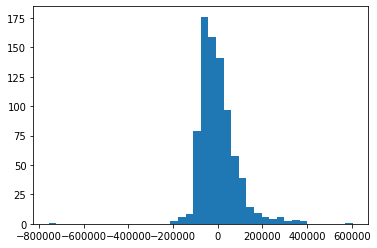

In [91]:
# Plot the residuals to see if they are normally distributed, they appear to be
plt.hist(residuals, bins = 40);

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [92]:
# A: Create dummy variable for the column Type
df = pd.get_dummies(data=df, columns=['type'])
df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [93]:
# A:
## ? I think I did this in one step

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [94]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


In [95]:
# A: Define our features and our y
features = ['sq__ft', 'type_Condo', 'type_Multi-Family', 'type_Residential']
X = df[features]
y = df['price']

In [96]:
# Create and fit our model, make predictions
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_
linreg.intercept_
print(list(zip(features, linreg.coef_)))

# Making predictions
predictions = linreg.predict(X)
# print(predictions)
# Residuals
residuals = y - predictions
print(residuals.mean())

[('sq__ft', 124.77690914538456), ('type_Condo', 6202.04771460917), ('type_Multi-Family', -35039.31814920627), ('type_Residential', 28837.270434597096)]
-5.548700763583916e-12


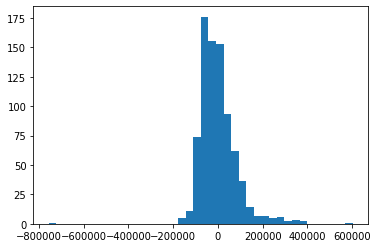

In [97]:
# Plot the residuals to see if they are normally distributed, they appear to be
plt.hist(residuals, bins = 40);

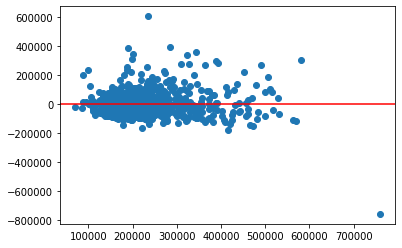

In [98]:
# Plot the residuals to see if they appear to be normally distributed
plt.scatter(x = predictions, y = residuals)
plt.axhline(0, color = 'red')

In [99]:
# Print out the metrics for our model

out_string = "The Coef is : " + str(linreg.coef_)
print(out_string)

out_string = "The Y Intercept is : " + str(linreg.intercept_)
print(out_string)

# MAE
out_string = "The MAE is : " + str(metrics.mean_absolute_error(y, predictions))
print(out_string)

mse = metrics.mean_squared_error(y, predictions)
# MSE
out_string = "The MSE is : " + str(mse)
print(out_string)

# RMSE
mse1 = mse**(0.5)
out_string = "The RMSE is : " + str(mse1)
print(out_string)

# R2 from sklearn
R2 = metrics.r2_score(y, predictions)
out_string = "The R2 is : " + str(R2)
print(out_string)

# R2 from model
l_score = linreg.score(X, y)
out_string = "The R2 is : " + str(l_score)
print(out_string)

The Coef is : [   124.77690915   6202.04771461 -35039.31814921  28837.2704346 ]
The Y Intercept is : 4165.275660076877
The MAE is : 59769.60565428818
The MSE is : 7358221752.36131
The RMSE is : 85780.07782907003
The R2 is : 0.487508607182529
The R2 is : 0.487508607182529


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

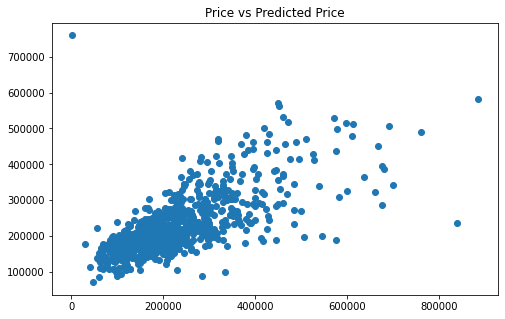

In [100]:
# A: Plot of the true price vs predicted price
plt.figure(figsize=(8, 5))
plt.scatter(x = df['price'], y = predictions)

plt.title('Price vs Predicted Price');


### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [102]:
# A: Independence: It is assumed that squarefootage is independant of the neighborhood the house is built in, this is most likely not true

# The R2 scores are low, meaning that there is variance in the y data that is not accounted for in the variance of X.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [103]:
# A:
import statsmodels.api as sm

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [109]:
# A: Calculate R2 Adjusted
def r2_adj(y, predictions):
    p = len(features)
    n = len(y)
    R2 = metrics.r2_score(y, predictions)
    return ((1-(1-R2**2))*(n - 1)/(n - p - 1))


### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [112]:
# A:
# Print out the metrics for our model
def metr(y, predictions):
    out_string = "The Coef is : " + str(linreg.coef_)
    print(out_string)

    out_string = "The Y Intercept is : " + str(linreg.intercept_)
    print(out_string)

    # MAE
    out_string = "The MAE is : " + str(metrics.mean_absolute_error(y, predictions))
    print(out_string)

    mse = metrics.mean_squared_error(y, predictions)
    # MSE
    out_string = "The MSE is : " + str(mse)
    print(out_string)

    # RMSE
    mse1 = mse**(0.5)
    out_string = "The RMSE is : " + str(mse1)
    print(out_string)

    # R2 from sklearn
    R2 = metrics.r2_score(y, predictions)
    out_string = "The R2 is : " + str(R2)
    print(out_string)

    # R2 from model
    l_score = linreg.score(X, y)
    out_string = "The R2 is : " + str(l_score)
    print(out_string)

    # R2 from model
    R2_A = r2_adj(y, predictions)
    out_string = "The R2_adj is : " + str(R2_A)
    print(out_string)

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [113]:
# A:
metr(y, predictions)

The Coef is : [   124.77690915   6202.04771461 -35039.31814921  28837.2704346 ]
The Y Intercept is : 4165.275660076877
The MAE is : 59769.60565428818
The MSE is : 7358221752.36131
The RMSE is : 85780.07782907003
The R2 is : 0.487508607182529
The R2 is : 0.487508607182529
The R2_adj is : 0.2388411997110942


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [114]:
# A: This model is high bias, low variance. The R2 values are well below 1, but the model is consistant between our testing and training predictions.
# This means the model is inaccurate, but will have little variation in it's predictions.